Introduction

The following analysis utilizes data from train.csv, which have been made available for examination.

The purpose of this analysis is to comprehend the data profile. This understanding is crucial for identifying any missing values within the dataset and subsequently addressing them appropriately. Techniques such as imputation or exclusion of missing values can be employed for this purpose.

Furthermore, prior to model training, an exploratory data analysis will be conducted to acquire valuable insights about the dataset.

In [89]:
#loading the libraries
import pandas as pd 
import numpy as nd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [90]:
#loading the train.csv and test.csv file
train = pd.read_csv("train.csv")

#looking in the first lines
train.head()



,type,sector,net_usable_area,net_area,n_rooms,n_bathroom,latitude,longitude,price
0,departamento,vitacura,140.0,170.0,4.0,4.0,-33.40123,-70.58056,11900
1,casa,la reina,225.0,659.0,4.0,3.0,-33.44340,-70.56920,17900
2,casa,las condes,110.0,200.0,3.0,3.0,-33.39320,-70.55050,10300
3,departamento,lo barnechea,250.0,250.0,3.0,4.0,-33.35670,-70.54260,30000
4,departamento,providencia,70.0,79.0,2.0,2.0,-33.44425,-70.61317,5700


In [91]:
#categorical to dummy
train= train.join(pd.get_dummies(train.type)).drop(['type'],axis=1)
train = train.join(pd.get_dummies(train.sector)).drop(['sector'],axis=1)
train['bathroom_ratio'] = train['n_bathroom']/train['n_rooms']

In [92]:
#info
train.info() #there's no missing value (if there were we could use dropana(inplace=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16212 entries, 0 to 16211
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   net_usable_area  16212 non-null  float64
 1   net_area         16212 non-null  float64
 2   n_rooms          16212 non-null  float64
 3   n_bathroom       16212 non-null  float64
 4   latitude         16212 non-null  float64
 5   longitude        16212 non-null  float64
 6   price            16212 non-null  int64  
 7   casa             16212 non-null  uint8  
 8   departamento     16212 non-null  uint8  
 9   la reina         16212 non-null  uint8  
 10  las condes       16212 non-null  uint8  
 11  lo barnechea     16212 non-null  uint8  
 12  nunoa            16212 non-null  uint8  
 13  providencia      16212 non-null  uint8  
 14  vitacura         16212 non-null  uint8  
 15  bathroom_ratio   16181 non-null  float64
dtypes: float64(7), int64(1), uint8(8)
memory usage: 1.1 MB


In [93]:
train.describe()

,net_usable_area,net_area,n_rooms,n_bathroom,latitude,longitude,price,casa,departamento,la reina,las condes,lo barnechea,nunoa,providencia,vitacura,bathroom_ratio
count,16212.000000,1.621200e+04,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16212.000000,16181.000000
mean,249.409339,6.186665e+02,3.590550,3.024241,-33.403506,-70.560875,16180.463607,0.409943,0.590057,0.062608,0.347520,0.178140,0.118678,0.114051,0.179003,0.870081
std,2774.766864,1.169530e+04,1.449744,1.331352,0.036072,0.036081,12774.658484,0.491838,0.491838,0.242264,0.476197,0.382642,0.323419,0.317883,0.383367,0.275767
min,0.000000,0.000000e+00,0.000000,0.000000,-33.524410,-70.643660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,1.100000e+02,3.000000,2.000000,-33.431350,-70.589872,8079.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
50%,140.000000,1.984750e+02,3.000000,3.000000,-33.406670,-70.564120,12500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,242.000000,4.750000e+02,4.000000,4.000000,-33.378327,-70.531537,20000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180116.000000,1.430000e+06,55.000000,55.000000,-33.305250,-70.431890,215000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [94]:
train.shape

(16212, 16)

In [95]:
train.columns

Index(['net_usable_area', 'net_area', 'n_rooms', 'n_bathroom', 'latitude',
       'longitude', 'price', 'casa', 'departamento', 'la reina', 'las condes',
       'lo barnechea', 'nunoa', 'providencia', 'vitacura', 'bathroom_ratio'],
      dtype='object')

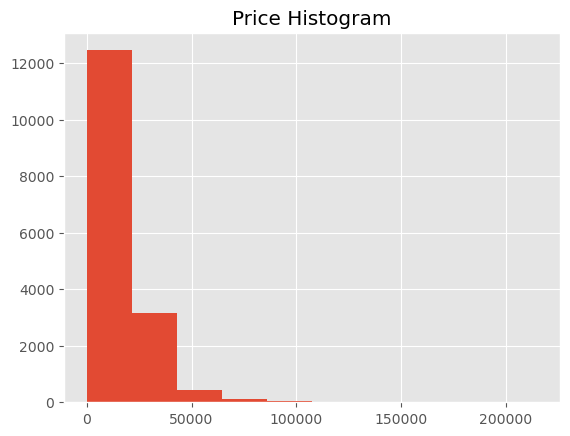

In [96]:
#univariate analysis
_ = plt.hist(train.price)
_ = plt.title("Price Histogram")

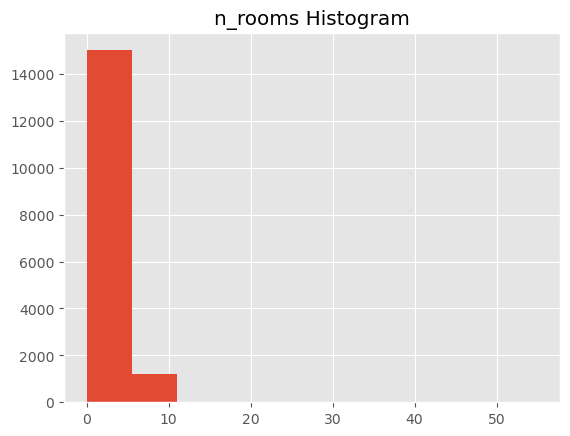

In [97]:
_ = plt.hist(train.n_rooms)
_ = plt.title("n_rooms Histogram")

In [98]:
#train.type.value_counts()             

In [99]:
#train.type.value_counts(1)     

In [100]:
#train.sector.value_counts(1)       

In [101]:
#_ = train.sector.value_counts(1).plot.bar()
#_ = plt.title("Sectors") 
#the communes are from the metropolitan region of santiago
#n-1 dummies and avoiding arbitrary weighting error

In [102]:
#Bivariate analysis
#_ = sns.boxplot(x = 'type', y = 'price', data=train)  #in chile departments are like apartments in other countries

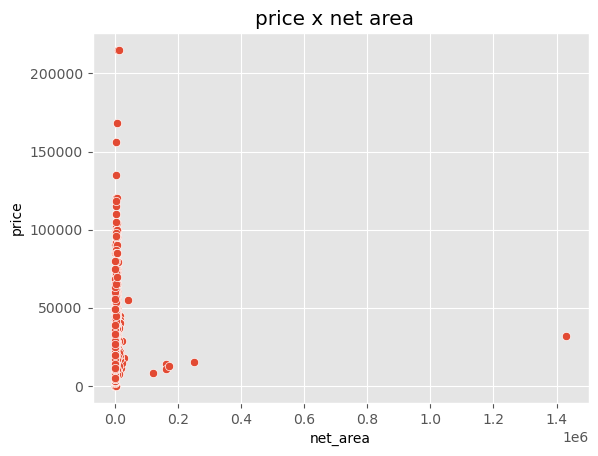

In [103]:
_ = sns.scatterplot(x='net_area', y ='price', data=train)
_ = plt.title("price x net area  ")

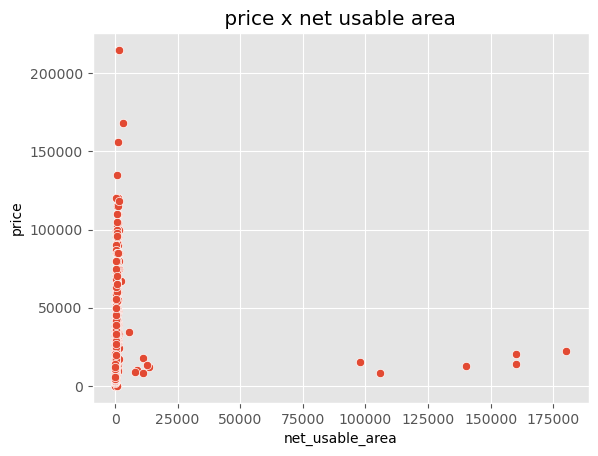

In [104]:
_ = sns.scatterplot(x='net_usable_area', y ='price', data=train)
_ = plt.title(" price x net usable area ")

In [105]:
#Multivariate analysis
train.corr()

,net_usable_area,net_area,n_rooms,n_bathroom,latitude,longitude,price,casa,departamento,la reina,las condes,lo barnechea,nunoa,providencia,vitacura,bathroom_ratio
net_usable_area,1.000000,0.168450,0.025642,0.035318,0.030792,0.024843,0.046249,0.010050,-0.010050,-0.004471,-0.000049,0.019191,-0.020244,-0.016811,0.014750,0.017190
net_area,0.168450,1.000000,0.030432,0.032263,0.024697,0.032149,0.053362,0.036992,-0.036992,0.000283,0.005179,0.016681,-0.015149,-0.014354,0.001421,0.005085
n_rooms,0.025642,0.030432,1.000000,0.636368,0.301094,0.293868,0.508710,0.543487,-0.543487,0.095122,-0.059971,0.261709,-0.187572,-0.144352,0.031102,-0.251434
n_bathroom,0.035318,0.032263,0.636368,1.000000,0.413842,0.348156,0.571469,0.384912,-0.384912,0.028764,-0.019273,0.292550,-0.268709,-0.188584,0.096827,0.468598
latitude,0.030792,0.024697,0.301094,0.413842,1.000000,0.595562,0.472086,0.291043,-0.291043,-0.294381,-0.074101,0.738132,-0.510475,-0.292896,0.214856,0.152733
longitude,0.024843,0.032149,0.293868,0.348156,0.595562,1.000000,0.331589,0.378523,-0.378523,0.111115,0.232910,0.489446,-0.379702,-0.466917,-0.140558,0.064964
price,0.046249,0.053362,0.508710,0.571469,0.472086,0.331589,1.000000,0.449767,-0.449767,-0.045869,-0.046568,0.297358,-0.267929,-0.191969,0.175245,0.125530
casa,0.010050,0.036992,0.543487,0.384912,0.291043,0.378523,0.449767,1.000000,-1.000000,0.241719,-0.136330,0.308463,-0.136012,-0.187405,-0.021152,-0.167680
departamento,-0.010050,-0.036992,-0.543487,-0.384912,-0.291043,-0.378523,-0.449767,-1.000000,1.000000,-0.241719,0.136330,-0.308463,0.136012,0.187405,0.021152,0.167680
la reina,-0.004471,0.000283,0.095122,0.028764,-0.294381,0.111115,-0.045869,0.241719,-0.241719,1.000000,-0.188608,-0.120319,-0.094835,-0.092726,-0.120674,-0.080528


array([[<Axes: title={'center': 'net_usable_area'}>,
        <Axes: title={'center': 'net_area'}>,
        <Axes: title={'center': 'n_rooms'}>,
        <Axes: title={'center': 'n_bathroom'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'casa'}>],
       [<Axes: title={'center': 'departamento'}>,
        <Axes: title={'center': 'la reina'}>,
        <Axes: title={'center': 'las condes'}>,
        <Axes: title={'center': 'lo barnechea'}>],
       [<Axes: title={'center': 'nunoa'}>,
        <Axes: title={'center': 'providencia'}>,
        <Axes: title={'center': 'vitacura'}>,
        <Axes: title={'center': 'bathroom_ratio'}>]], dtype=object)

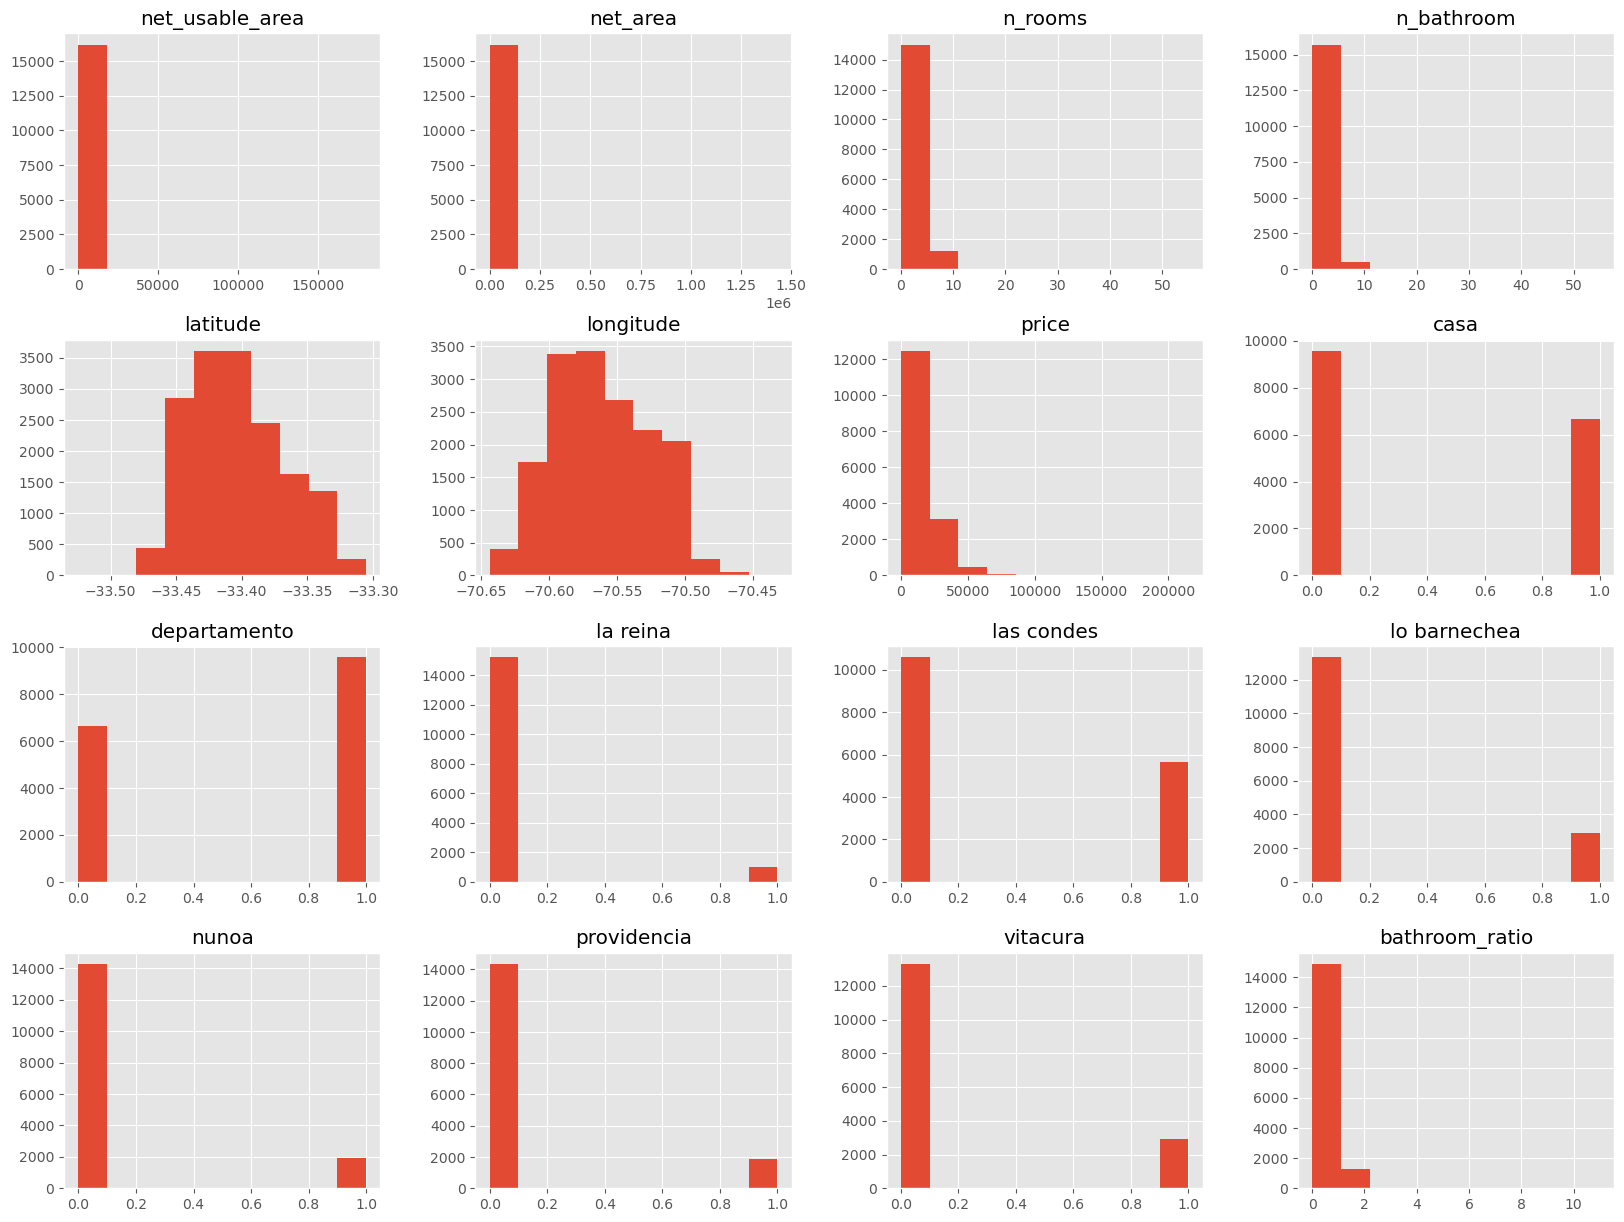

In [106]:
train.hist(figsize=(20,15))

<Axes: >

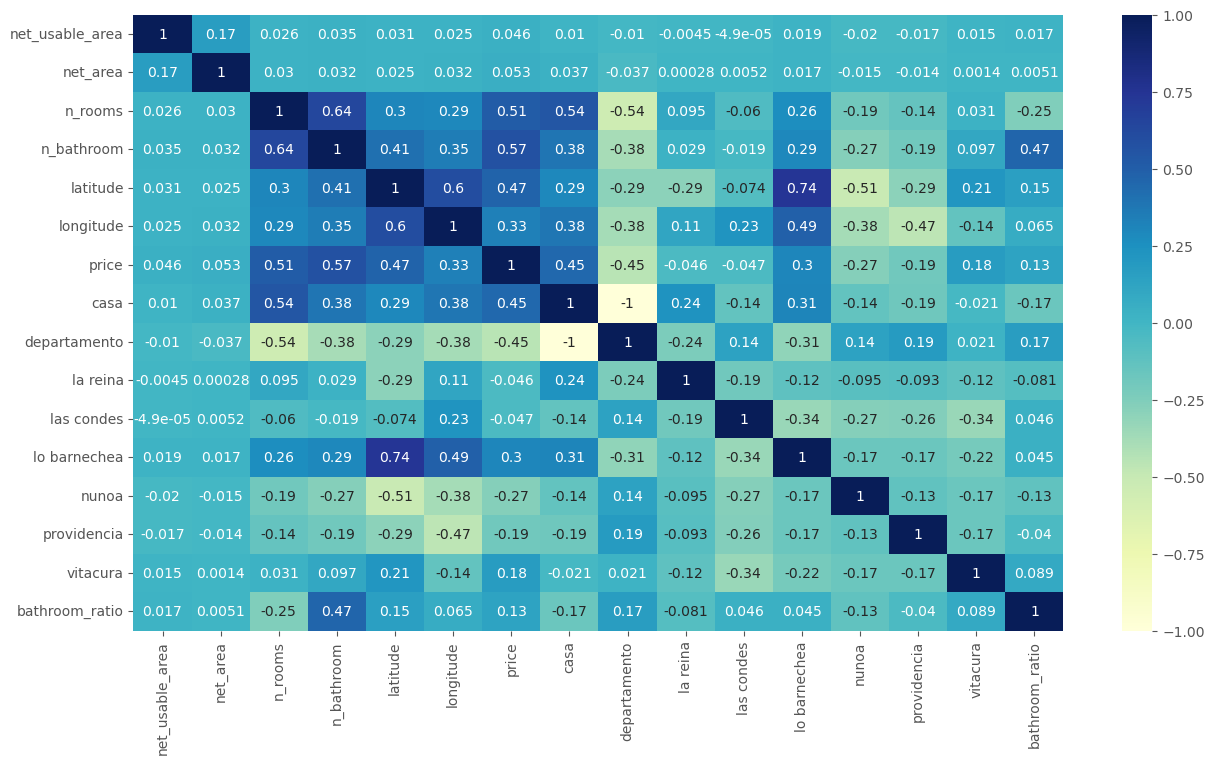

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

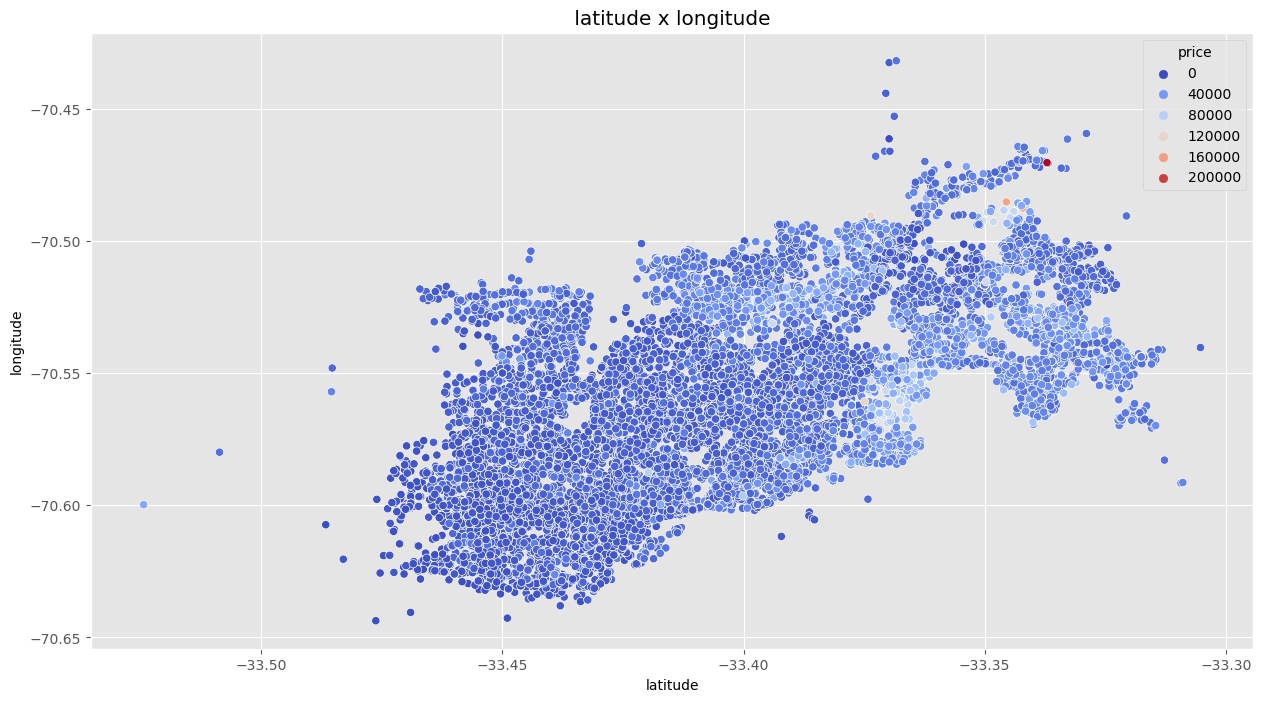

In [108]:
_ = plt.figure(figsize=(15,8))
_ = sns.scatterplot(x='latitude', y ='longitude', data=train,hue="price" ,palette="coolwarm")
_ = plt.title(" latitude x longitude ")